## T1. Fred API Test

In [1]:
from fredapi import Fred

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import plotly.express as px

plt.style.use('cyberpunk')

In [2]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [3]:
import json

In [4]:
f = open('../config.json')
f

<_io.TextIOWrapper name='config.json' mode='r' encoding='UTF-8'>

In [5]:
fred_key = json.load(f)['fred_key']

In [6]:
fred = Fred(api_key=fred_key)

In [7]:
fred.search('S&P', order_by='popularity')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-10-18,2023-10-18,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-10-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-17 09:05:10-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-10-18,2023-10-18,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-09-26 08:11:02-05:00,89,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-10-18,2023-10-18,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-10-16,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-10-17 09:05:09-05:00,84,This data represents the effective yield of th...
SP500,SP500,2023-10-18,2023-10-18,S&P 500,2013-10-18,2023-10-17,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-10-17 19:11:01-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-10-18,2023-10-18,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,81,Household data are collected as of March. As ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDM02MUA156NWDB,DDDM02MUA156NWDB,2023-10-18,2023-10-18,Stock Market Total Value Traded to GDP for Mau...,1993-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:32:15-05:00,3,Total value of all traded shares in a stock ma...
DDEM01JOA156NWDB,DDEM01JOA156NWDB,2023-10-18,2023-10-18,Stock Market Turnover Ratio (Value Traded/Capi...,2007-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:41-05:00,3,Total value of shares traded during the period...
DDEM01PGA156NWDB,DDEM01PGA156NWDB,2023-10-18,2023-10-18,Stock Market Turnover Ratio (Value Traded/Capi...,2003-01-01,2017-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-08-04 09:48:41-05:00,3,Total value of shares traded during the period...


## T2. High Yield Bonds Spread

In [8]:
credit_spread = fred.get_series('BAMLH0A0HYM2').to_frame(name='rr')
credit_spread

,rr
1996-12-31,3.13
1997-01-01,NaN
1997-01-02,3.06
1997-01-03,3.09
1997-01-06,3.10
...,...
2023-10-10,4.26
2023-10-11,4.25
2023-10-12,4.25
2023-10-13,4.30


In [9]:
import seaborn as sns

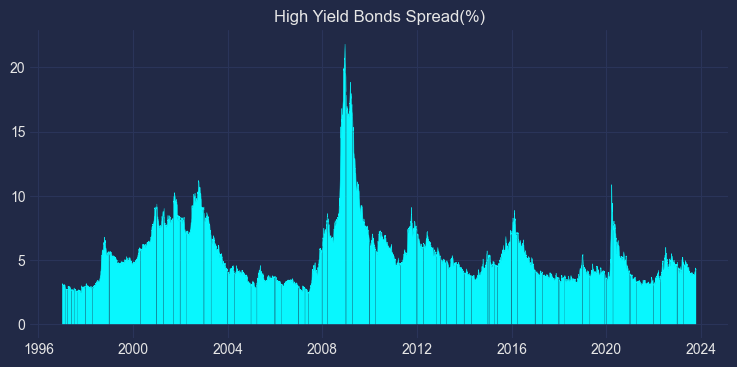

In [10]:
plt.figure(figsize=(9, 4))

line = plt.plot(credit_spread)

plt.setp(line, linewidth=0.3)
plt.fill_between(y2=credit_spread['rr'], y1=0, x=credit_spread.index)

plt.title('High Yield Bonds Spread(%)')

plt.show()

## T3. Unemployment Rate

In [11]:
unemp_rate = fred.search('unemployment rate state')
unemp_rate

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-10-18,2023-10-18,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-10-06 07:46:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-10-18,2023-10-18,Unemployment Rate,1948-01-01,2023-09-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-10-06 07:45:02-05:00,56,The unemployment rate represents the number of...
CCSA,CCSA,2023-10-18,2023-10-18,Continued Claims (Insured Unemployment),1967-01-07,2023-09-30,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-10-12 07:33:03-05:00,72,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-10-18,2023-10-18,Unemployment Level,1948-01-01,2023-09-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-10-06 07:46:04-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2023-10-18,2023-10-18,Noncyclical Rate of Unemployment,1949-01-01,2025-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-01 11:01:03-05:00,68,"Starting with the July, 2021 report: An Update..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FORT018URN,FORT018URN,2023-10-18,2023-10-18,"Unemployment Rate in Fort Wayne, IN (MSA)",1990-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 10:27:07-05:00,4,None
ORCLAT7URN,ORCLAT7URN,2023-10-18,2023-10-18,"Unemployment Rate in Clatsop County, OR",1990-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 10:29:03-05:00,4,These data come from the Current Population Su...
VAAUGU0URN,VAAUGU0URN,2023-10-18,2023-10-18,"Unemployment Rate in Augusta County, VA",1990-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-27 10:14:02-05:00,4,These data come from the Current Population Su...


### 3-1. Indexing

In [12]:
idx_monthly = unemp_rate['frequency']=='Monthly'
idx_percent = unemp_rate['units']=='Percent'
idx_seasonal = unemp_rate['seasonal_adjustment']=='Seasonally Adjusted'
idx_title = unemp_rate['title'].str.contains('Unemployment Rate in')
idx_updated = unemp_rate['last_updated'].apply(lambda x : x.year) == 2023

In [13]:
unemp_rate = unemp_rate.loc[idx_monthly * idx_percent * idx_seasonal * idx_title * idx_updated]
unemp_rate

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-10-18,2023-10-18,Unemployment Rate in California,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:02-05:00,59,None
TXUR,TXUR,2023-10-18,2023-10-18,Unemployment Rate in Texas,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:01-05:00,53,None
NYUR,NYUR,2023-10-18,2023-10-18,Unemployment Rate in New York,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:03-05:00,51,None
FLUR,FLUR,2023-10-18,2023-10-18,Unemployment Rate in Florida,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:03-05:00,50,None
MIUR,MIUR,2023-10-18,2023-10-18,Unemployment Rate in Michigan,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:04-05:00,37,None
ALUR,ALUR,2023-10-18,2023-10-18,Unemployment Rate in Alabama,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:04-05:00,37,None
OHUR,OHUR,2023-10-18,2023-10-18,Unemployment Rate in Ohio,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:03-05:00,37,None
COUR,COUR,2023-10-18,2023-10-18,Unemployment Rate in Colorado,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:03-05:00,37,None
ILUR,ILUR,2023-10-18,2023-10-18,Unemployment Rate in Illinois,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:07-05:00,24,None


### 3-2. Sampling

In [14]:
# sample 30
unemp_rate.iloc[:30]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-10-18,2023-10-18,Unemployment Rate in California,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:02-05:00,59,None
TXUR,TXUR,2023-10-18,2023-10-18,Unemployment Rate in Texas,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:01-05:00,53,None
NYUR,NYUR,2023-10-18,2023-10-18,Unemployment Rate in New York,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:03-05:00,51,None
FLUR,FLUR,2023-10-18,2023-10-18,Unemployment Rate in Florida,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:03-05:00,50,None
MIUR,MIUR,2023-10-18,2023-10-18,Unemployment Rate in Michigan,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:04-05:00,37,None
ALUR,ALUR,2023-10-18,2023-10-18,Unemployment Rate in Alabama,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:04-05:00,37,None
OHUR,OHUR,2023-10-18,2023-10-18,Unemployment Rate in Ohio,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:03-05:00,37,None
COUR,COUR,2023-10-18,2023-10-18,Unemployment Rate in Colorado,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:08:03-05:00,37,None
ILUR,ILUR,2023-10-18,2023-10-18,Unemployment Rate in Illinois,1976-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-21 10:07:07-05:00,24,None


### 3-3. Get Series from Fred

In [15]:
li_series = []

for idx in unemp_rate.index:
    idx_series = fred.get_series(idx)
    li_series.append(idx_series)

In [16]:
unemp_df = pd.concat(li_series, axis=1)
unemp_df.columns = unemp_rate.index
unemp_df

series id,CAUR,TXUR,NYUR,FLUR,MIUR,ALUR,OHUR,COUR,ILUR,PAUR,...,DEUR,MEUR,VTUR,RIUR,NEUR,NHUR,SDUR,CMWRUR,CNERUR,CWSTUR
1976-01-01,9.2,5.8,10.3,9.7,9.9,6.6,8.1,5.8,6.6,8.0,...,8.0,8.7,8.6,7.8,3.3,6.5,3.3,6.8,9.6,8.6
1976-02-01,9.2,5.8,10.3,9.7,9.9,6.6,8.1,5.7,6.6,8.1,...,8.0,8.7,8.6,7.8,3.3,6.5,3.3,6.8,9.6,8.6
1976-03-01,9.1,5.9,10.2,9.6,9.9,6.6,8.1,5.7,6.6,8.1,...,8.0,8.6,8.6,7.7,3.3,6.5,3.2,6.8,9.6,8.6
1976-04-01,9.1,5.9,10.2,9.5,9.8,6.5,8.0,5.6,6.6,8.1,...,8.1,8.6,8.6,7.7,3.2,6.5,3.1,6.7,9.5,8.5
1976-05-01,9.0,5.9,10.1,9.3,9.6,6.4,7.8,5.6,6.6,8.1,...,8.3,8.5,8.5,7.7,3.1,6.5,3.1,6.6,9.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,4.5,4.0,4.0,2.6,3.8,2.2,3.7,2.8,4.2,4.1,...,4.3,2.4,2.4,3.0,2.0,2.1,1.9,3.3,3.7,4.0
2023-05-01,4.5,4.1,3.9,2.6,3.7,2.2,3.6,2.8,4.1,4.0,...,4.2,2.4,2.1,3.0,1.9,1.9,1.9,3.2,3.6,4.0
2023-06-01,4.6,4.1,3.9,2.6,3.6,2.2,3.4,2.8,4.0,3.8,...,4.2,2.4,1.9,2.9,1.9,1.8,1.8,3.2,3.5,4.0
2023-07-01,4.6,4.1,3.9,2.7,3.6,2.1,3.3,2.9,4.0,3.5,...,4.1,2.4,1.8,2.8,2.0,1.7,1.9,3.2,3.5,4.0


### 3-4. Null Check

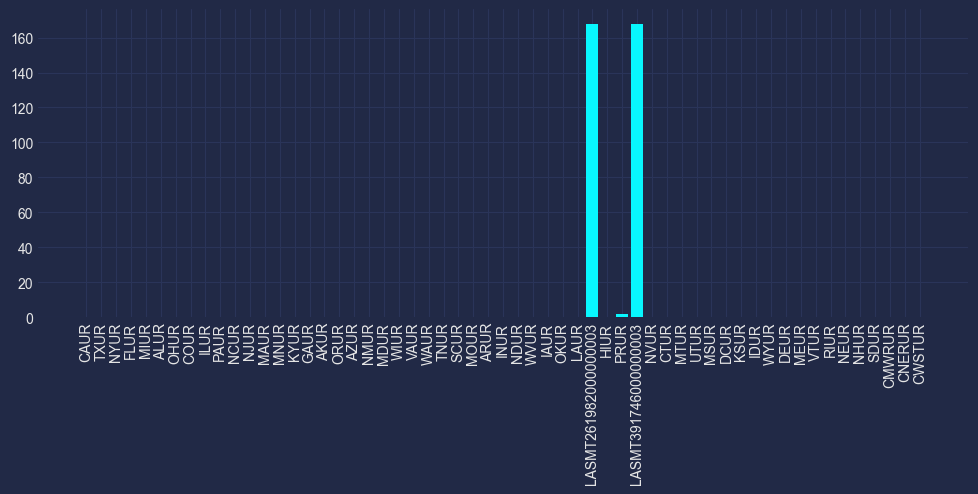

In [17]:
unemp_df_na = unemp_df.isna().sum()

plt.figure(figsize=(12,4))
plt.bar(x=unemp_df_na.index, height=unemp_df_na.values)
plt.xticks(rotation=90)
plt.show()

### 3-5. Drop Columns that contain NA

In [18]:
col_notnull = unemp_df.isna().sum() == 0
col_notnull

series id
CAUR                     True
TXUR                     True
NYUR                     True
FLUR                     True
MIUR                     True
ALUR                     True
OHUR                     True
COUR                     True
ILUR                     True
PAUR                     True
NCUR                     True
NJUR                     True
MAUR                     True
MNUR                     True
KYUR                     True
GAUR                     True
AKUR                     True
ORUR                     True
AZUR                     True
NMUR                     True
MDUR                     True
WIUR                     True
VAUR                     True
WAUR                     True
TNUR                     True
SCUR                     True
MOUR                     True
ARUR                     True
INUR                     True
NDUR                     True
WVUR                     True
IAUR                     True
OKUR                     True


In [19]:
unemp_df = unemp_df.loc[:, col_notnull]
unemp_df

series id,CAUR,TXUR,NYUR,FLUR,MIUR,ALUR,OHUR,COUR,ILUR,PAUR,...,DEUR,MEUR,VTUR,RIUR,NEUR,NHUR,SDUR,CMWRUR,CNERUR,CWSTUR
1976-01-01,9.2,5.8,10.3,9.7,9.9,6.6,8.1,5.8,6.6,8.0,...,8.0,8.7,8.6,7.8,3.3,6.5,3.3,6.8,9.6,8.6
1976-02-01,9.2,5.8,10.3,9.7,9.9,6.6,8.1,5.7,6.6,8.1,...,8.0,8.7,8.6,7.8,3.3,6.5,3.3,6.8,9.6,8.6
1976-03-01,9.1,5.9,10.2,9.6,9.9,6.6,8.1,5.7,6.6,8.1,...,8.0,8.6,8.6,7.7,3.3,6.5,3.2,6.8,9.6,8.6
1976-04-01,9.1,5.9,10.2,9.5,9.8,6.5,8.0,5.6,6.6,8.1,...,8.1,8.6,8.6,7.7,3.2,6.5,3.1,6.7,9.5,8.5
1976-05-01,9.0,5.9,10.1,9.3,9.6,6.4,7.8,5.6,6.6,8.1,...,8.3,8.5,8.5,7.7,3.1,6.5,3.1,6.6,9.5,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-01,4.5,4.0,4.0,2.6,3.8,2.2,3.7,2.8,4.2,4.1,...,4.3,2.4,2.4,3.0,2.0,2.1,1.9,3.3,3.7,4.0
2023-05-01,4.5,4.1,3.9,2.6,3.7,2.2,3.6,2.8,4.1,4.0,...,4.2,2.4,2.1,3.0,1.9,1.9,1.9,3.2,3.6,4.0
2023-06-01,4.6,4.1,3.9,2.6,3.6,2.2,3.4,2.8,4.0,3.8,...,4.2,2.4,1.9,2.9,1.9,1.8,1.8,3.2,3.5,4.0
2023-07-01,4.6,4.1,3.9,2.7,3.6,2.1,3.3,2.9,4.0,3.5,...,4.1,2.4,1.8,2.8,2.0,1.7,1.9,3.2,3.5,4.0


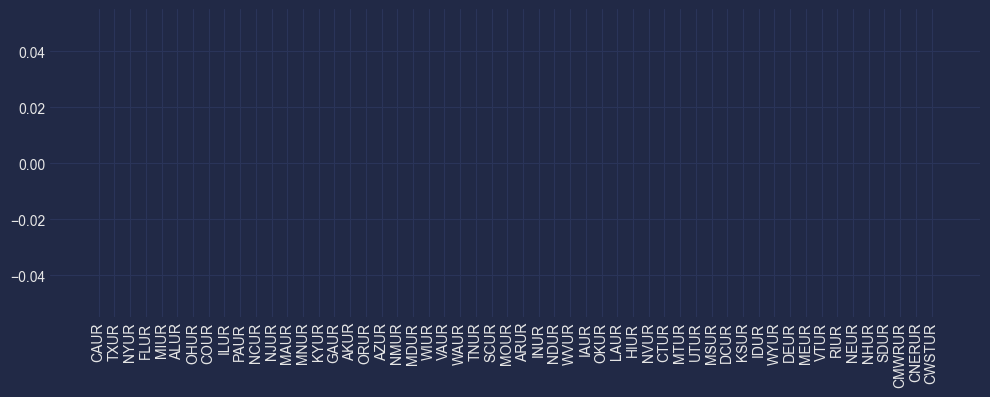

In [20]:
unemp_df_na2 = unemp_df.isna().sum()

plt.figure(figsize=(12,4))
plt.bar(x=unemp_df_na2.index, height=unemp_df_na2.values)
plt.xticks(rotation=90)
plt.show()

### 3-5. Heatmap of 30 states - from 1976 to 2023

In [21]:
unemp_df_y = unemp_df.resample('Y').agg('mean')
unemp_df_y

series id,CAUR,TXUR,NYUR,FLUR,MIUR,ALUR,OHUR,COUR,ILUR,PAUR,...,DEUR,MEUR,VTUR,RIUR,NEUR,NHUR,SDUR,CMWRUR,CNERUR,CWSTUR
1976-12-31,9.150000,5.816667,10.208333,9.300000,9.400000,6.700000,7.725000,5.916667,6.550000,8.008333,...,8.600000,8.650000,8.258333,8.008333,3.150000,6.425000,3.316667,6.583333,9.425000,8.600000
1977-12-31,8.391667,5.433333,9.166667,8.275000,8.225000,7.150000,6.458333,6.350000,6.191667,7.741667,...,8.183333,8.358333,7.008333,8.041667,3.366667,5.566667,3.375000,5.991667,8.416667,7.891667
1978-12-31,7.133333,4.866667,7.708333,6.758333,7.033333,6.408333,5.516667,5.558333,5.983333,7.008333,...,7.075000,6.416667,5.658333,6.308333,2.966667,3.816667,3.158333,5.316667,6.958333,6.616667
1979-12-31,6.216667,4.416667,7.100000,5.991667,7.866667,7.225000,5.866667,4.616667,5.583333,6.975000,...,6.975000,6.625000,4.983333,6.316667,2.850000,3.133333,3.358333,5.533333,6.566667,6.000000
1980-12-31,6.900000,5.250000,7.433333,5.983333,12.300000,8.816667,8.316667,5.883333,8.216667,8.141667,...,7.516667,7.475000,5.933333,7.241667,3.808333,4.508333,4.716667,8.183333,7.150000,6.950000
1981-12-31,7.433333,5.350000,7.558333,6.800000,12.375000,10.691667,9.566667,5.641667,8.625000,8.366667,...,7.783333,7.241667,5.850000,7.558333,4.125000,5.058333,4.808333,8.608333,7.425000,7.425000
1982-12-31,10.058333,6.900000,8.700000,8.483333,15.458333,13.950000,12.575000,7.608333,11.400000,10.900000,...,8.358333,8.583333,6.850000,9.991667,5.500000,6.866667,5.425000,11.091667,8.925000,9.866667
1983-12-31,9.825000,8.058333,8.883333,8.641667,14.483333,13.816667,12.350000,7.116667,11.708333,11.108333,...,7.900000,8.283333,6.541667,8.458333,5.566667,5.500000,5.208333,10.866667,8.725000,9.591667
1984-12-31,7.758333,6.158333,7.225000,6.591667,11.233333,11.283333,9.466667,5.491667,9.133333,8.933333,...,6.216667,6.125000,4.916667,5.316667,4.491667,4.200000,4.366667,8.416667,6.816667,7.533333
1985-12-31,7.183333,7.025000,6.600000,6.075000,10.000000,9.541667,8.916667,5.983333,9.058333,8.000000,...,5.150000,5.558333,4.583333,4.658333,5.050000,3.658333,4.825000,8.016667,6.158333,7.225000


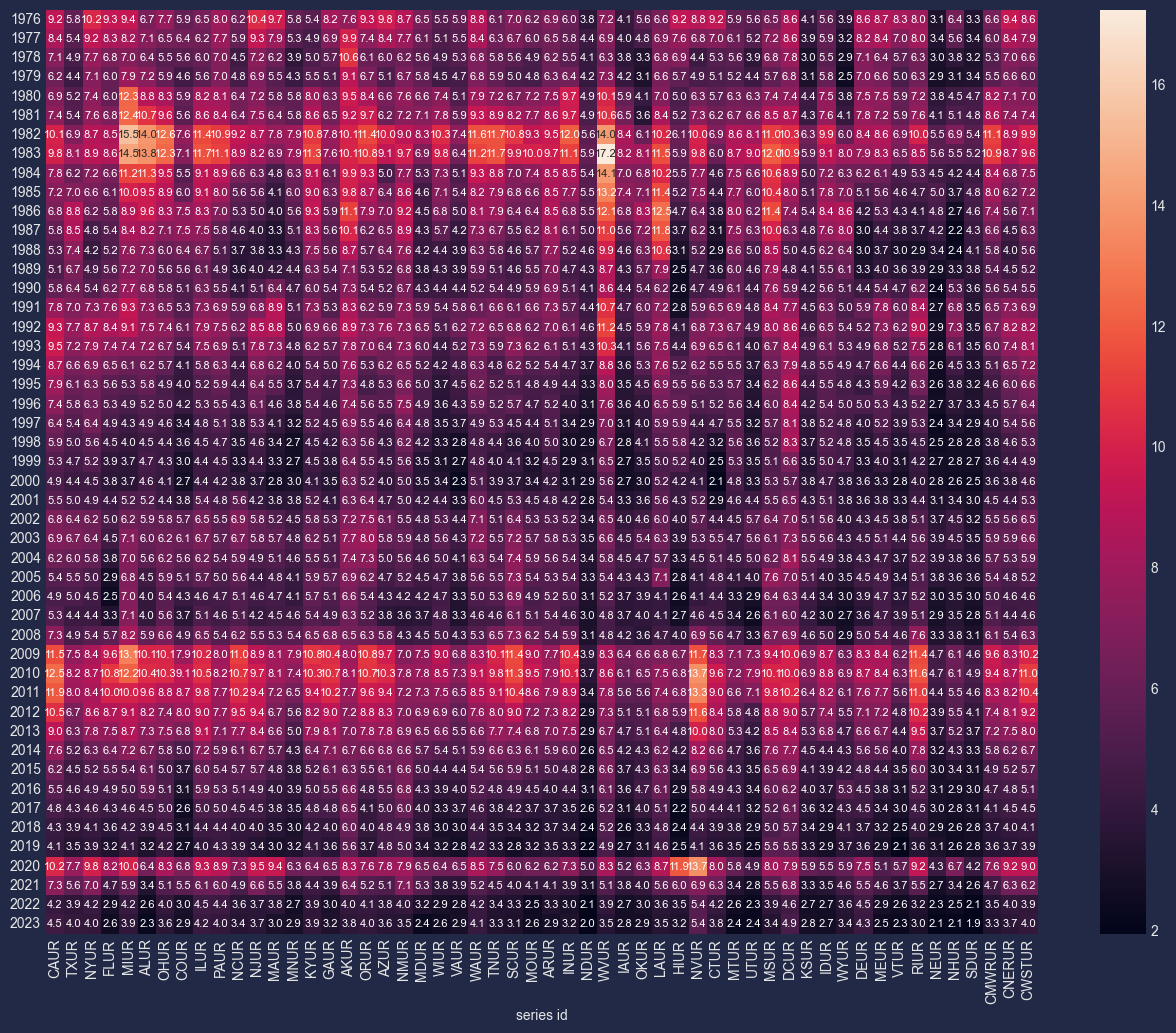

In [28]:
plt.figure(figsize=(16,12))

sns.heatmap(unemp_df_y, annot=True, fmt='.1f', annot_kws={"fontsize":8})

plt.xticks(np.arange(0.5, len(unemp_df_y.columns), 1), unemp_df_y.columns, rotation=90)
plt.yticks(np.arange(0.5, len(unemp_df_y.index), 1), [str(x)[:4] for x in unemp_df_y.index])

plt.show()